In [6]:
import os

print(os.listdir("/content/"))


['.config', 'sample_data']


In [7]:
import os

# Path to the uploaded file or folder
file_path = "/content/DatasetLeaf.zip"

# Check if it's a file or directory
if os.path.isdir(file_path):
    print(f"{file_path} is a directory. Contents:")
    print(os.listdir(file_path))
elif os.path.isfile(file_path):
    print(f"{file_path} is a file.")
else:
    print(f"{file_path} does not exist.")


/content/DatasetLeaf.zip does not exist.


In [12]:
import zipfile
import os

# Path to the ZIP file
zip_path = "DatasetLeaf.zip"

# Target extraction directory
extract_dir = "DatasetLeaf"

# Extract the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted to:", extract_dir)


Dataset extracted to: DatasetLeaf


In [13]:
# Check contents of the extracted directory
if os.path.isdir(extract_dir):
    print(f"{extract_dir} is a directory. Contents:")
    for root, dirs, files in os.walk(extract_dir):
        print(f"Root: {root}")
        print(f"Directories: {dirs}")
        print(f"Files: {files}")


DatasetLeaf is a directory. Contents:
Root: DatasetLeaf
Directories: ['Dataset']
Files: []
Root: DatasetLeaf/Dataset
Directories: ['train', 'Val']
Files: []
Root: DatasetLeaf/Dataset/train
Directories: ['Shadow', 'No_Shadow']
Files: []
Root: DatasetLeaf/Dataset/train/Shadow
Directories: []
Files: ['BacterialSpot17.jpg_label_Tomato leaf mosaic virus_score_0.51_crop_2.jpg', 'IMG_4327.JPG_label_leaf_score_0.83_crop_1.jpg', 'IMG_4336.JPG_label_leaf_score_0.57_crop_5.jpg', 'IMG_4350.JPG_label_leaf_score_0.86_crop_1.jpg', '7-blueberry-leaves.jpg_label_Blueberry leaf_score_0.50_crop_15.jpg', '22+August+2013+010-1.jpg_label_Peach leaf_score_0.50_crop_4.jpg', 'Black_Rot_of_Grapes1168.jpg_label_grape leaf_score_0.83_crop_2.jpg', '0pe.jpg_label_Peach leaf_score_0.70_crop_12.jpg', 'IMG_4351.JPG_label_leaf_score_0.88_crop_1.jpg', 'IMG_4280.JPG_label_leaf_score_0.83_crop_5.jpg', 'IMG_4744.JPG_label_leaf_score_0.79_crop_4.jpg', 'IMG_4394.JPG_label_leaf_score_0.86_crop_2.jpg', 'IMG_4351.JPG_label_leaf

In [14]:
pip install torch torchvision


In [15]:
import os

# Check the folder contents
base_path = "/content/DatasetLeaf/Dataset"
print("Contents of Dataset folder:", os.listdir(base_path))

# Check if train and val folders exist
train_dir = os.path.join(base_path, "train")
val_dir = os.path.join(base_path, "Val")
print("Train folder exists:", os.path.exists(train_dir))
print("Validation folder exists:", os.path.exists(val_dir))


Contents of Dataset folder: ['train', 'Val']
Train folder exists: True
Validation folder exists: True


In [16]:
data_dir = "/content/DatasetLeaf/Dataset"  # Correct path
train_dir = os.path.join(data_dir, "train")
train_dir
val_dir = os.path.join(data_dir, "Val")
val_dir


'/content/DatasetLeaf/Dataset/Val'

In [17]:
print("Contents of train folder:", os.listdir(train_dir))


Contents of train folder: ['Shadow', 'No_Shadow']


In [18]:
valid_extensions = ['.jpg', '.jpeg', '.png']
train_files = [f for f in os.listdir(train_dir) if os.path.isfile(os.path.join(train_dir, f)) and any(f.endswith(ext) for ext in valid_extensions)]


In [19]:
print(f"Valid image files in train folder: {train_files}")


Valid image files in train folder: []


Contents of Dataset folder: ['train', 'Val']
Train folder exists: True
Validation folder exists: False
Subdirectories in train folder: ['Shadow', 'No_Shadow']
Valid image files in train folder: [('/content/DatasetLeaf/Dataset/train/Shadow/BacterialSpot17.jpg_label_Tomato leaf mosaic virus_score_0.51_crop_2.jpg', 'Shadow'), ('/content/DatasetLeaf/Dataset/train/Shadow/IMG_4327.JPG_label_leaf_score_0.83_crop_1.jpg', 'Shadow'), ('/content/DatasetLeaf/Dataset/train/Shadow/IMG_4336.JPG_label_leaf_score_0.57_crop_5.jpg', 'Shadow'), ('/content/DatasetLeaf/Dataset/train/Shadow/IMG_4350.JPG_label_leaf_score_0.86_crop_1.jpg', 'Shadow'), ('/content/DatasetLeaf/Dataset/train/Shadow/7-blueberry-leaves.jpg_label_Blueberry leaf_score_0.50_crop_15.jpg', 'Shadow'), ('/content/DatasetLeaf/Dataset/train/Shadow/22+August+2013+010-1.jpg_label_Peach leaf_score_0.50_crop_4.jpg', 'Shadow'), ('/content/DatasetLeaf/Dataset/train/Shadow/Black_Rot_of_Grapes1168.jpg_label_grape leaf_score_0.83_crop_2.jpg', 'Shadow'

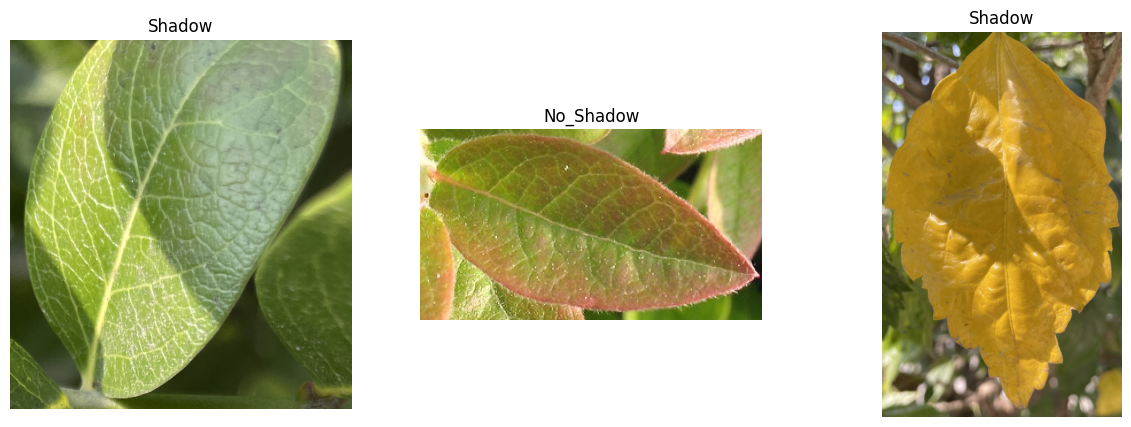

In [21]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the paths
base_path = "/content/DatasetLeaf/Dataset"
train_dir = os.path.join(base_path, "train")
val_dir = os.path.join(base_path, "val")

# Check the folder contents
print("Contents of Dataset folder:", os.listdir(base_path))

# Check if train and val folders exist
print("Train folder exists:", os.path.exists(train_dir))
print("Validation folder exists:", os.path.exists(val_dir))

# List the subdirectories (shadow and non shadow) inside the train folder
train_subdirs = [d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))]
print("Subdirectories in train folder:", train_subdirs)

# List files in shadow and non shadow directories (filter only image files)
valid_extensions = ['.jpg', '.jpeg', '.png']
train_files = []

for subdir in train_subdirs:
    subdir_path = os.path.join(train_dir, subdir)
    files = [f for f in os.listdir(subdir_path) if os.path.isfile(os.path.join(subdir_path, f)) and any(f.endswith(ext) for ext in valid_extensions)]
    train_files.extend([(os.path.join(subdir_path, f), subdir) for f in files])  # Include subdir in path

# Print the valid image files
print(f"Valid image files in train folder: {train_files}")

# Ensure there are images to display
if len(train_files) > 0:
    # Randomly select 3 images (mix from both shadow and non shadow)
    random.shuffle(train_files)
    sample_files = train_files[:3]  # You can adjust this number for more images

    # Display the selected images
    def display_sample_images(files):
        fig, axes = plt.subplots(1, len(files), figsize=(15, 5))
        for i, (img_path, label) in enumerate(files):
            img = Image.open(img_path)
            axes[i].imshow(img)
            axes[i].axis('off')  # Hide axes
            axes[i].set_title(label)  # Set the title to shadow or non shadow
        plt.show()

    # Display sample images
    display_sample_images(sample_files)
else:
    print("No valid images found in the train folder.")


In [22]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ]),
}

# Dataset paths
base_data_dir = "/content/DatasetLeaf/Dataset"
train_dir = os.path.join(base_data_dir, "train")
val_dir = os.path.join(base_data_dir, "Val")

# Load datasets
image_datasets = {
    'train': datasets.ImageFolder(train_dir, transform=data_transforms['train']),
    'val': datasets.ImageFolder(val_dir, transform=data_transforms['val']),
}

# Create dataloaders
dataloaders = {
    'train': DataLoader(image_datasets['train'], batch_size=32, shuffle=True),
    'val': DataLoader(image_datasets['val'], batch_size=32, shuffle=False),
}

# Class names
class_names = image_datasets['train'].classes
print("Classes:", class_names)


Classes: ['No_Shadow', 'Shadow']


 Define the MobileNetV2 Model

In [23]:
import torch
import torch.nn as nn
import torchvision.models as models

# Load pre-trained MobileNetV2 model
model = models.mobilenet_v2(pretrained=True)

# Modify the final layer for binary classification
model.classifier[1] = nn.Linear(model.classifier[1].in_features, 2)  # 2 classes: shadow and non-shadow

# Move model to GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Print model architecture to verify
print(model)


/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/mobilenet_v2-b0353104.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-b0353104.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 42.4MB/s]

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

Set up Loss and Optimizer

In [24]:
import torch.optim as optim

# Loss function (CrossEntropyLoss for classification)
criterion = nn.CrossEntropyLoss()

# Optimizer (Adam with learning rate of 0.001)
optimizer = optim.Adam(model.parameters(), lr=0.001)


Train the Model

In [25]:
import torch
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"Using device: {torch.device('cuda' if torch.cuda.is_available() else 'cpu')}")


CUDA available: False
Using device: cpu


In [26]:
# Function to train the model
def train_model(model, dataloaders, criterion, optimizer, num_epochs=20):
    best_model_wts = model.state_dict()  # Save the best weights
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f"Epoch {epoch+1}/{num_epochs}")

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluation mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize (only in train phase)
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print(f"{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}")

            # Deep copy the model if it has the best accuracy so far
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    print("Training complete")
    model.load_state_dict(best_model_wts)
    return model

# Train the model (10 epochs)
model = train_model(model, dataloaders, criterion, optimizer, num_epochs=20)


Epoch 1/20
train Loss: 0.5013 Acc: 0.7357
val Loss: 1.3499 Acc: 0.7500
Epoch 2/20
train Loss: 0.4368 Acc: 0.8714
val Loss: 1.3784 Acc: 0.7500
Epoch 3/20
train Loss: 0.2366 Acc: 0.8857
val Loss: 1.4989 Acc: 0.7333
Epoch 4/20
train Loss: 0.2738 Acc: 0.8857
val Loss: 2.0995 Acc: 0.7000
Epoch 5/20
train Loss: 0.1632 Acc: 0.9286
val Loss: 1.3583 Acc: 0.8500
Epoch 6/20
train Loss: 0.1533 Acc: 0.9357
val Loss: 1.6186 Acc: 0.8000
Epoch 7/20
train Loss: 0.1292 Acc: 0.9429
val Loss: 1.3914 Acc: 0.8000
Epoch 8/20
train Loss: 0.0587 Acc: 0.9857
val Loss: 0.8146 Acc: 0.8667
Epoch 9/20
train Loss: 0.0546 Acc: 0.9643
val Loss: 1.0808 Acc: 0.8167
Epoch 10/20
train Loss: 0.0387 Acc: 0.9857
val Loss: 1.3925 Acc: 0.7667
Epoch 11/20
train Loss: 0.0839 Acc: 0.9643
val Loss: 1.0869 Acc: 0.7333
Epoch 12/20
train Loss: 0.0117 Acc: 1.0000
val Loss: 1.1957 Acc: 0.8167
Epoch 13/20
train Loss: 0.0268 Acc: 0.9929
val Loss: 1.0275 Acc: 0.8000
Epoch 14/20
train Loss: 0.0203 Acc: 0.9929
val Loss: 1.1063 Acc: 0.8000
E

 Evaluate the Model

In [27]:
# Function to evaluate the model on the validation set
def evaluate_model(model, dataloaders):
    model.eval()  # Set model to evaluation mode

    running_corrects = 0
    total = 0

    # Iterate over validation data
    for inputs, labels in dataloaders['val']:
        inputs = inputs.to(device)
        labels = labels.to(device)

        # Forward pass
        with torch.no_grad():
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

        # Calculate number of correct predictions
        running_corrects += torch.sum(preds == labels.data)
        total += labels.size(0)

    accuracy = running_corrects.double() / total
    print(f"Validation Accuracy: {accuracy:.4f}")

# Evaluate the model on the validation set
evaluate_model(model, dataloaders)


Validation Accuracy: 0.8167


In [30]:
import torch
from PIL import Image
from torchvision import transforms

# Define the transformations (should match the ones used during training)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize based on ImageNet statistics
])

# Function to load and transform the image
def load_image(image_path):
    image = Image.open(image_path)  # Load the image
    image = transform(image)  # Apply transformations
    image = image.unsqueeze(0)  # Add a batch dimension (1, C, H, W)
    return image

# Function to make a prediction on a single image
def predict_image(model, image_path):
    # Load the image
    image = load_image(image_path)

    # Move the image to the device (GPU or CPU)
    image = image.to(device)

    # Set model to evaluation mode
    model.eval()

    # Disable gradients for inference
    with torch.no_grad():
        # Get model predictions
        outputs = model(image)
        _, preds = torch.max(outputs, 1)

    # Get predicted class
    class_names = ['Shadow', 'No_Shadow']  # Update class names according to your dataset
    predicted_class = class_names[preds.item()]

    print(f"Predicted Class: {predicted_class}")

# Example usage: Predict the class of an uploaded image
image_path = "/content/DatasetLeaf/Dataset/Val/No_Shadow/IMG_4764.JPG_label_leaf_score_0.75_crop_5.jpg" # Path to your uploaded image in Colab
predict_image(model, image_path)


Predicted Class: Shadow


Import Necessary Libraries

In [83]:
import zipfile
import os

# Path to the zip file
zip_file_path = r"F:\PIL LAB\DatasetLeaf.zip"
extract_to = r"F:\PIL LAB\DatasetLeaf"  # Choose the folder to extract to

# Extract the ZIP file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(f"Extracted to {extract_to}")


FileNotFoundError: [Errno 2] No such file or directory: 'F:\\PIL LAB\\DatasetLeaf.zip'

In [85]:
import os
from PIL import Image
import torch
from torchvision import transforms

# Define the transformations
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize the image
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize the image
])

# Define the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load the trained model
# Assuming your model is already loaded and trained:
# model = your_model_here
model.to(device)

# Function to load and preprocess an image
def load_image(image_path):
    image = Image.open("F:\PIL LAB\PlantLeafDatasetl\train\shadow\IMG_4446.JPG")  # Load the image
    image = transform(image)  # Apply transformations
    image = image.unsqueeze(0)  # Add batch dimension (1, C, H, W)
    return image

# Function to predict the class of a single image
def predict_image(model, image):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():  # Disable gradient computation during inference
        output = model(image)  # Forward pass
        _, predicted_class = torch.max(output, 1)  # Get predicted class
    return predicted_class.item()  # Return the predicted class index

# Function to test all images in a folder
def predict_on_folder(model, folder_path):
    valid_extensions = ['.jpg', '.jpeg', '.png']  # Valid image file extensions
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and any(f.endswith(ext) for ext in valid_extensions)]

    # Loop through each image in the folder
    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = load_image(image_path)  # Load and preprocess the image
        image = image.to(device)  # Move the image to the same device as the model

        predicted_class = predict_image(model, image)  # Get the predicted class index
        class_names = ['shadow', 'non-shadow']  # Class labels
        predicted_label = class_names[predicted_class]  # Map the index to the class label

        print(f"Image: {image_file} - Predicted: {predicted_label}")

# Example usage: Predict all images in a folder on the F drive
folder_path = r"F:\PIL LAB\DatasetLeaf\Dataset\train\No_Shadow"  # Replace with your folder path on the F drive
predict_on_folder(model, folder_path)


FileNotFoundError: [Errno 2] No such file or directory: 'F:\\PIL LAB\\DatasetLeaf\\Dataset\\train\\No_Shadow'

In [77]:
import torch
from torchvision import transforms
from PIL import Image
import os


Define the Transformation for New Images

In [78]:
# Define the transformations for the new image
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize using ImageNet stats
])


Load the New Image

In [ ]:
def load_image(image_path):
    image = Image.open(image_path)  # Load the image
    image = transform(image)  # Apply the transformations
    image = image.unsqueeze(0)  # Add a batch dimension (1, C, H, W)
    return image

# Example usage: loading a new image
image_path = "/path/to/your/image.jpg"
new_image = load_image(image_path)

# Move the image to the device (GPU or CPU)
new_image = new_image.to(device)


Make Predictions

In [ ]:
def predict_image(model, image):
    model.eval()  # Set the model to evaluation mode

    with torch.no_grad():  # Disable gradient computation during inference
        output = model(image)  # Pass the image through the model

        # Get the predicted class
        _, predicted_class = torch.max(output, 1)

    return predicted_class.item()  # Return the class index (0 for shadow, 1 for non-shadow)

# Make prediction for the new image
predicted_class = predict_image(model, new_image)
print(f"Predicted class: {predicted_class}")


Translate Predicted Class into Human-Readable Label

In [ ]:
# Class names (as per your previous dataset structure)
class_names = ['shadow', 'non-shadow']

# Translate the predicted class index into a label
predicted_label = class_names[predicted_class]
print(f"Predicted label: {predicted_label}")


 Testing Multiple New Images

In [ ]:
def predict_on_folder(model, folder_path):
    # List all image files in the folder
    valid_extensions = ['.jpg', '.jpeg', '.png']
    image_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f)) and any(f.endswith(ext) for ext in valid_extensions)]

    for image_file in image_files:
        image_path = os.path.join(folder_path, image_file)
        image = load_image(image_path)
        predicted_class = predict_image(model, image)
        predicted_label = class_names[predicted_class]
        print(f"Image: {image_file} - Predicted: {predicted_label}")

# Example usage: Test all images in a folder
folder_path = "/path/to/your/folder"
predict_on_folder(model, folder_path)
